In [1]:
getwd()

[1] "C:/Users/alsdu/dacon"

In [2]:
setwd("C:/Users/alsdu/OneDrive/문서/카카오톡 받은 파일/20220424_데이터분석 스터디/20220424_데이터분석 스터디")

In [3]:
df<-read.csv("df_heart.csv")

In [4]:
str(df)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trtbps  : num  0.637 0.45 0.45 0.325 0.325 ...
 $ chol    : num  0.471 0.546 0.344 0.485 0.5 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalachh: num  0.687 0.704 0.878 0.93 0.8 ...
 $ exng    : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  0.575 0.875 0.35 0.2 0.15 0.1 0.325 0 0.125 0.4 ...
 $ slp     : int  0 0 2 2 2 1 1 2 2 2 ...
 $ caa     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thall   : int  1 2 2 2 2 1 2 3 3 2 ...
 $ output  : int  1 1 1 1 1 1 1 1 1 1 ...


# 1. Splitting the Dataset

In [5]:
set.seed(2022)

In [6]:
ind<-sample(2, nrow(df), replace=TRUE, prob=c(0.7,0.3))

In [7]:
train<-df[ind==1,]
test<-df[ind==2,]

In [8]:
nrow(train); nrow(test)

[1] 205

[1] 98

# 2. Fitting the Train set

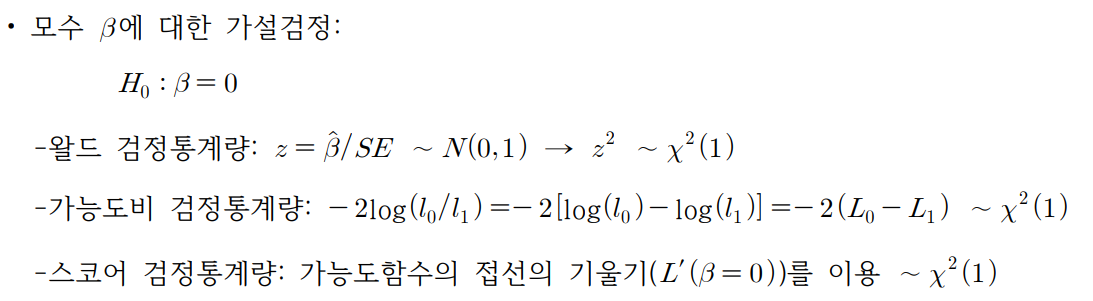

In [9]:
fit<-glm(output~. ,family=binomial, train)

## 2.1 유의성 검정

In [10]:
summary(fit)  #Wald test 


Call:
glm(formula = output ~ ., family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.84238  -0.27440   0.08868   0.49254   2.32191  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.74082    2.55228   1.857 0.063243 .  
age         -0.01907    0.03025  -0.630 0.528505    
sex         -1.76767    0.59690  -2.961 0.003062 ** 
cp           1.11736    0.27813   4.017 5.88e-05 ***
trtbps      -1.30644    1.18414  -1.103 0.269904    
chol        -2.51057    1.32786  -1.891 0.058666 .  
fbs         -0.79953    0.70585  -1.133 0.257333    
restecg      0.33579    0.44196   0.760 0.447383    
thalachh     2.09997    1.55836   1.348 0.177803    
exng        -0.97826    0.54805  -1.785 0.074264 .  
oldpeak     -1.73374    1.07424  -1.614 0.106546    
slp          1.04124    0.43260   2.407 0.016088 *  
caa         -1.18879    0.28566  -4.161 3.16e-05 ***
thall       -1.33235    0.40290  -3.307 0.000943 ***


In [11]:
library(car)
Anova(fit) #LRT

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

,LR Chisq,Df,Pr(>Chisq)
age,0.3974348,1,5.284170e-01
sex,10.2510407,1,1.366075e-03
cp,21.0966405,1,4.366930e-06
trtbps,1.2198378,1,2.693925e-01
chol,3.7265775,1,5.355302e-02
fbs,1.2551210,1,2.625766e-01
restecg,0.5772206,1,4.474038e-01
thalachh,1.9047292,1,1.675499e-01
exng,3.1689382,1,7.505122e-02
oldpeak,2.7055165,1,1.000017e-01


In [12]:
Anova<-as.data.frame( (Anova(fit)) ) 

In [13]:
o<-order(Anova[,3], decreasing=FALSE)
Anova[o,]

,LR Chisq,Df,Pr(>Chisq)
cp,21.0966405,1,4.366930e-06
caa,20.3270672,1,6.527068e-06
thall,12.1014008,1,5.038396e-04
sex,10.2510407,1,1.366075e-03
slp,6.0541866,1,1.387336e-02
chol,3.7265775,1,5.355302e-02
exng,3.1689382,1,7.505122e-02
oldpeak,2.7055165,1,1.000017e-01
thalachh,1.9047292,1,1.675499e-01
fbs,1.2551210,1,2.625766e-01


- 중요 순위 같음 같음

## 2.2 적합성 검정(글로벌 검정)
-    `Null deviance`: 284.88  on 205  degrees of freedom
- `Residual deviance`: 152.61  on 192  degrees of freedom

In [14]:
1- pchisq(284.88-152.61, 205-192)

[1] 0

1. 가설설정 
- H_0: beta_1= ...=beta_all = 0
- H_A: Not H_0
2. 결론
- (매우 작은 유의 수준 하에서도) 귀무가설 기각할 근거 충분함
3. 해석 
- 매우 유의함-> 적어도 하나의 예측변수가 유의한 효과를 갖고 있다고 할 수 있음
- 즉, 모형은 적합하다.

# 3. Model Selection

## 3.1. Multicollinearity

In [15]:
vif(fit)

age      sex       cp   trtbps     chol      fbs  restecg thalachh 
1.302002 1.260370 1.596293 1.136683 1.186866 1.215221 1.037183 1.380879 
    exng  oldpeak      slp      caa    thall 
1.181228 1.416295 1.528098 1.237853 1.223159

- 다중공선성 문제 없음 (rule of thumb 통계값인 5보다 크지 않음)

## 3.2. Feature Selection

### 3.2.1 AIC
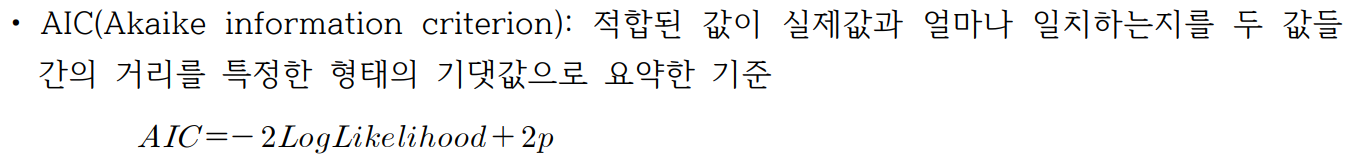

In [16]:
library(MASS); stepAIC(fit)

Start:  AIC=154.48
output ~ age + sex + cp + trtbps + chol + fbs + restecg + thalachh + 
    exng + oldpeak + slp + caa + thall

           Df Deviance    AIC
- age       1   126.88 152.88
- restecg   1   127.06 153.06
- trtbps    1   127.70 153.70
- fbs       1   127.73 153.73
- thalachh  1   128.38 154.38
<none>          126.48 154.48
- oldpeak   1   129.18 155.18
- exng      1   129.65 155.65
- chol      1   130.21 156.21
- slp       1   132.53 158.53
- sex       1   136.73 162.73
- thall     1   138.58 164.58
- caa       1   146.81 172.81
- cp        1   147.57 173.57

Step:  AIC=152.88
output ~ sex + cp + trtbps + chol + fbs + restecg + thalachh + 
    exng + oldpeak + slp + caa + thall

           Df Deviance    AIC
- restecg   1   127.49 151.49
- fbs       1   128.35 152.35
- trtbps    1   128.45 152.45
<none>          126.88 152.88
- oldpeak   1   129.37 153.37
- exng      1   130.00 154.00
- thalachh  1   130.03 154.03
- chol      1   130.95 154.95
- slp       1   133.09 157.0


Call:  glm(formula = output ~ sex + cp + trtbps + chol + thalachh + 
    exng + oldpeak + slp + caa + thall, family = binomial, data = train)

Coefficients:
(Intercept)          sex           cp       trtbps         chol     thalachh  
      3.727       -1.718        1.019       -1.629       -2.734        2.388  
       exng      oldpeak          slp          caa        thall  
     -1.034       -1.493        1.029       -1.210       -1.264  

Degrees of Freedom: 204 Total (i.e. Null);  194 Residual
Null Deviance:	    283.6 
Residual Deviance: 129 	AIC: 151

### 3.2.2. BIC
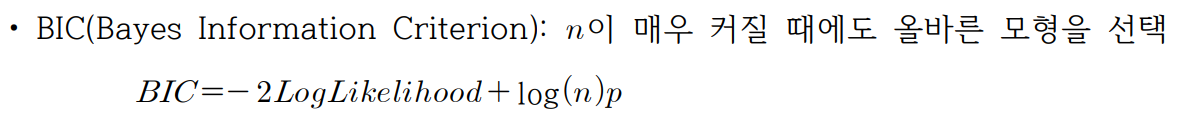

In [17]:
library(leaps)
library(bestglm)

Warning message:
"package 'leaps' was built under R version 3.6.3"Warning message:
"package 'bestglm' was built under R version 3.6.3"

In [18]:
str(train)

'data.frame':	205 obs. of  14 variables:
 $ age     : int  37 41 56 57 57 56 44 52 54 48 ...
 $ sex     : int  1 0 1 0 1 0 1 1 1 0 ...
 $ cp      : int  2 1 1 0 0 1 1 2 0 2 ...
 $ trtbps  : num  0.45 0.45 0.325 0.325 0.575 0.575 0.325 0.975 0.575 0.45 ...
 $ chol    : num  0.546 0.344 0.485 0.5 0.291 ...
 $ fbs     : int  0 0 0 0 0 0 0 1 0 0 ...
 $ restecg : int  1 0 1 1 1 0 1 1 1 1 ...
 $ thalachh: num  0.704 0.878 0.93 0.8 0.67 ...
 $ exng    : int  0 0 0 1 0 0 0 0 0 0 ...
 $ oldpeak : num  0.875 0.35 0.2 0.15 0.1 0.325 0 0.125 0.3 0.05 ...
 $ slp     : int  0 2 2 2 1 1 2 2 2 2 ...
 $ caa     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thall   : int  2 2 2 2 1 2 3 3 2 2 ...
 $ output  : int  1 1 1 1 1 1 1 1 1 1 ...


In [19]:
#?bestglm

In [20]:
bestglm(train,family=binomial, IC="BIC")

Morgan-Tatar search since family is non-gaussian.


BIC
BICq equivalent for q in (0.280649546308115, 0.556958444626915)
Best Model:
              Estimate Std. Error   z value     Pr(>|z|)
(Intercept)  2.4230826  0.9932026  2.439666 1.470085e-02
sex         -1.3536421  0.5020989 -2.695967 7.018460e-03
cp           0.9793826  0.2282415  4.290992 1.778768e-05
exng        -1.2701488  0.4758942 -2.668973 7.608350e-03
slp          1.4371849  0.3804380  3.777711 1.582764e-04
caa         -1.2369629  0.2723420 -4.541946 5.573719e-06
thall       -1.3410357  0.3660080 -3.663952 2.483536e-04

In [21]:
bestglm(train,family=binomial, IC="BIC")$BestModel 

Morgan-Tatar search since family is non-gaussian.



Call:  glm(formula = y ~ ., family = family, data = Xi, weights = weights)

Coefficients:
(Intercept)          sex           cp         exng          slp          caa  
     2.4231      -1.3536       0.9794      -1.2701       1.4372      -1.2370  
      thall  
    -1.3410  

Degrees of Freedom: 204 Total (i.e. Null);  198 Residual
Null Deviance:	    283.6 
Residual Deviance: 142.1 	AIC: 156.1

### 3.2.3. Cross-Validation 
- test set 예측력 향상, 과적합 방지
- K-fold, K=10

In [22]:
bestglm(train,  family=binomial, IC="CV", CVArgs=list(Method="HTF", K=10, REP=1))

Morgan-Tatar search since family is non-gaussian.


CV(K = 10, REP = 1)
BICq equivalent for q in (0.132064986723129, 0.280649546308115)
Best Model:
             Estimate Std. Error   z value     Pr(>|z|)
(Intercept)  1.708480  0.9259912  1.845028 6.503349e-02
sex         -1.397646  0.4855506 -2.878476 3.996021e-03
cp           1.129875  0.2273208  4.970397 6.681583e-07
slp          1.723465  0.3794688  4.541783 5.578041e-06
caa         -1.209618  0.2654007 -4.557704 5.171577e-06
thall       -1.434705  0.3607138 -3.977407 6.967084e-05

## 3.3. Fitting 

In [23]:
fit_aic<- glm(output ~ sex + cp + chol + restecg + thalachh + 
              exng + oldpeak + caa + thall, family = binomial, data = train)
fit_bic<-bestglm(train,family=binomial, IC="BIC")$BestModel 
fit_cv<- glm(output~ sex+cp+oldpeak+caa, family = binomial, data = train)

Morgan-Tatar search since family is non-gaussian.


## 3.4 Predict

In [24]:
prop<-sum(train$output)/ nrow(train)  ; prop #threshold=0.5291

[1] 0.5268293

In [25]:
pred_aic<- as.numeric (fitted(fit_aic)> prop)
pred_bic<- as.numeric (fitted(fit_bic)> prop)
pred_cv<-as.numeric(fitted(fit_cv)>prop)

# 4. Diagnosis 
#적합도 검정, 영향점 검정 

# 5. Evaluation

## 5.1. Confusion Matrix

In [29]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2


In [30]:
confusionMatrix(as.factor(pred_aic) , as.factor(train$output), positive="1") #  Accuracy : 0.8398  
confusionMatrix(as.factor(pred_bic) , as.factor(train$output), positive="1") #  Accuracy : 0.8544    
confusionMatrix(as.factor(pred_cv) , as.factor(train$output), positive="1")  #  Accuracy : 0.8058 

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 79 12
         1 18 96
                                         
               Accuracy : 0.8537         
                 95% CI : (0.7977, 0.899)
    No Information Rate : 0.5268         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.7055         
                                         
 Mcnemar's Test P-Value : 0.3613         
                                         
            Sensitivity : 0.8889         
            Specificity : 0.8144         
         Pos Pred Value : 0.8421         
         Neg Pred Value : 0.8681         
             Prevalence : 0.5268         
         Detection Rate : 0.4683         
   Detection Prevalence : 0.5561         
      Balanced Accuracy : 0.8517         
                                         
       'Positive' Class : 1              
                                         

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 82 15
         1 15 93
                                         
               Accuracy : 0.8537         
                 95% CI : (0.7977, 0.899)
    No Information Rate : 0.5268         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.7065         
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.8611         
            Specificity : 0.8454         
         Pos Pred Value : 0.8611         
         Neg Pred Value : 0.8454         
             Prevalence : 0.5268         
         Detection Rate : 0.4537         
   Detection Prevalence : 0.5268         
      Balanced Accuracy : 0.8532         
                                         
       'Positive' Class : 1              
                                         

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 77 15
         1 20 93
                                          
               Accuracy : 0.8293          
                 95% CI : (0.7706, 0.8781)
    No Information Rate : 0.5268          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6566          
                                          
 Mcnemar's Test P-Value : 0.499           
                                          
            Sensitivity : 0.8611          
            Specificity : 0.7938          
         Pos Pred Value : 0.8230          
         Neg Pred Value : 0.8370          
             Prevalence : 0.5268          
         Detection Rate : 0.4537          
   Detection Prevalence : 0.5512          
      Balanced Accuracy : 0.8275          
                                          
       'Positive' Class : 1               
                                    

## 5.2. ROC Curve

In [31]:
library(pROC)

Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



In [32]:
roc_aic<-roc(  pred_aic, train$output    ); auc(roc_aic)
roc_bic<-roc(  pred_bic, train$output    ); auc(roc_bic)
roc_cv<-roc(  pred_cv, train$output    ); auc(roc_cv)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8551

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8532

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.83

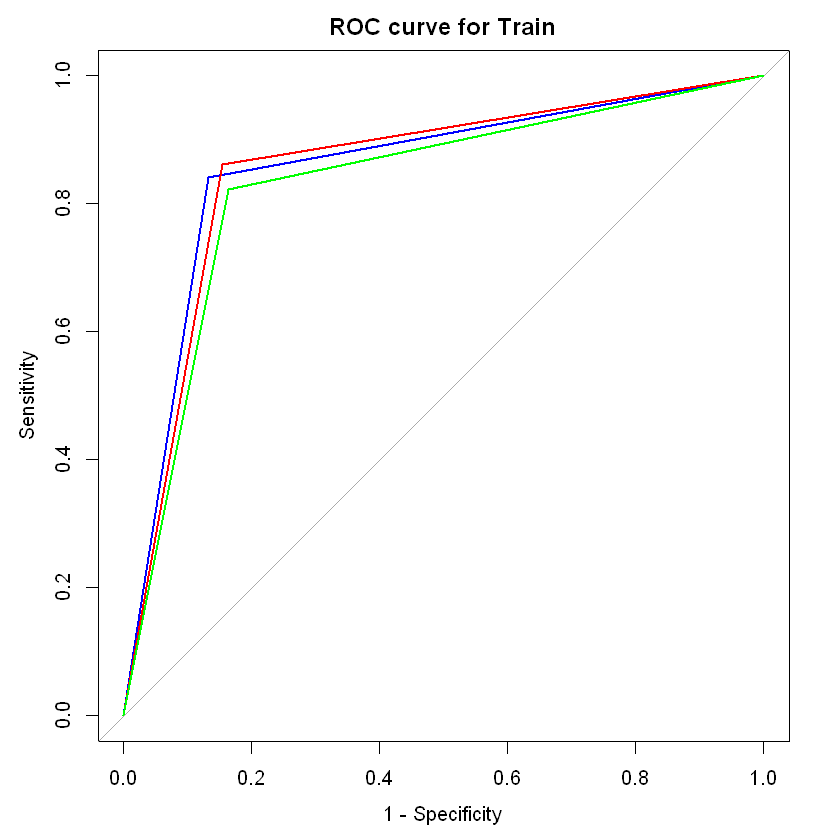

In [33]:
#시각화
plot.roc(roc_aic, main="ROC curve for Train", col="blue", legacy.axes=T)
plot.roc(roc_bic, col="red", add=TRUE)
plot.roc(roc_cv, col="green", add=TRUE)

- `bic 모델 채택`

## 5.2 Multiple Correlation Coefficient
- 이때, R은 target과 fitted value 간의 상관계수

In [34]:
cor(train$output, fitted(fit_aic)) #0.722
cor(train$output, fitted(fit_bic)) # 0.706
cor(train$output, fitted(fit_cv)) # 0.663

[1] 0.7629256

[1] 0.7485068

[1] 0.6934004

- 상관계수는 bic 모델모다 aic 모델이 더 높지만, 위 두 결과와 차원을 생각해서 `bic 모델 채택`

# 6. Fitting the Final Model on Test set

In [35]:
pred_test <- predict(fit_bic, test, type="response")

In [36]:
head(pred_test)

1        10        17        20        21        26 
0.9350239 0.9615986 0.9897902 0.9560435 0.1799802 0.7541441

In [37]:
prop_test<-sum(test$output)/ nrow(test)  ; prop_test #threshold=0.5773

[1] 0.5816327

In [38]:
pred_test2<- as.numeric ( pred_test > prop_test)

In [39]:
confusionMatrix(as.factor(pred_test2) , as.factor(test$output), positive="1")  # Accuracy : 0.8041   

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 35 12
         1  6 45
                                          
               Accuracy : 0.8163          
                 95% CI : (0.7253, 0.8874)
    No Information Rate : 0.5816          
    P-Value [Acc > NIR] : 6.736e-07       
                                          
                  Kappa : 0.6302          
                                          
 Mcnemar's Test P-Value : 0.2386          
                                          
            Sensitivity : 0.7895          
            Specificity : 0.8537          
         Pos Pred Value : 0.8824          
         Neg Pred Value : 0.7447          
             Prevalence : 0.5816          
         Detection Rate : 0.4592          
   Detection Prevalence : 0.5204          
      Balanced Accuracy : 0.8216          
                                          
       'Positive' Class : 1               
                                    

In [40]:
roc_test<-roc(  pred_test2, test$output    ); auc(roc_test) # 0.7995

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8135

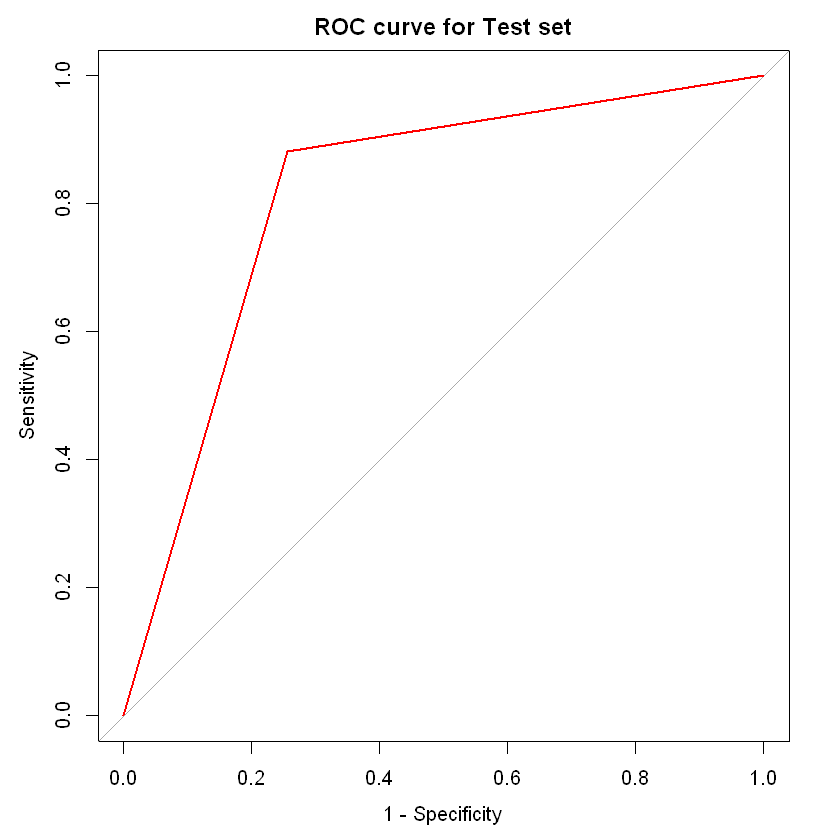

In [41]:
plot.roc(roc_test, main="ROC curve for Test set", col="red", legacy.axes=T)